# Linear Programming

- **Linear Programming(LP) is a method to achieve the best outcome (such as maximum profit or lowest cost) in a mathematical model whose requirements are represented by linear relationships. The term "linear" refers to the fact that the objective function and the constraints are linear.**

- **It is a mathematical programming that is used to find the best or optimal solution to a problem that requires decision or set of decisions about how best to use a set of limited resources to achieve  a state of goal of objectives.**

## LP Model Formulation

- **Decision variables**
> -- mathematical symbols representing levels of acivity of an operation

- **Objective Function**
> -- a linear relationship reflecting the objective of an operation
> -- most frequent objective of buiseness is to *maximize profit*
> -- most frequent objective of individual operation units is to *minimize cost*
- **Constraints**
> -- a linear relationship representing a restriction on decision making

# Diet Problem:

- A dietician has to develop a special diet using two foods P and Q

- Each packet (containing 30g) of food P contains 
> - 12 units of calcium
> - 4 units of iron
> - 6 units of cholestrol
> - 6 units of Vit A


- Each packet (containing 30g) of food Q contains 
> - 3 units of calcium
> - 20 units of iron
> - 4 units of cholestrol
> - 3 units of Vit A

- The diet requires at least 
> - 240 units of calcium
> - 460 units of iron
> - 300 units of cholestrol

### `How many packets of each food should be used to minimize the amount of vitamin  A in the diet?`



In [1]:
import pandas as pd
import numpy as np
data = {'Food': ['P', 'Q', 'Diet'],
        'calcium': [12, 3, 'at least 240'],
        'iron': [4, 20, 'at least 460'],
        'cholesterol': [6, 4, 'at most 300'],
        'vitA': [6, 3, '?']}

df = pd.DataFrame(data)

# Set "Food" as the index
df.set_index('Food', inplace=True)
df

,calcium,iron,cholesterol,vitA
Food,,,,
P,12,4,6,6
Q,3,20,4,3
Diet,at least 240,at least 460,at most 300,?


Let $x_1$ and $x_2$ the number of packets of food P and Q respectively.
Obviously $x\geq 0$,$y\geq 0$. Mathematical formulation of the given problem is as follows:

- **Minimize $z = 6x_1 +3x_2$** (vitamin A) subject to constraints

- constarint on calcium : $12x_1 +3x_2 \geq 240$ , i.e., $4x_1 + x_2 \geq 80$

- constarint on iron : $4x_1 + 20x_2 \geq 460$ , i.e., $x_1 +5x_2 \geq 115$

- constarint on cholesterol : $6x_1 +4x_2 \leq 300$ , i.e., $3x_1+2x_2 \leq 150$

- Non negative restriction$x_1\geq 0$,$x_2\geq 0$

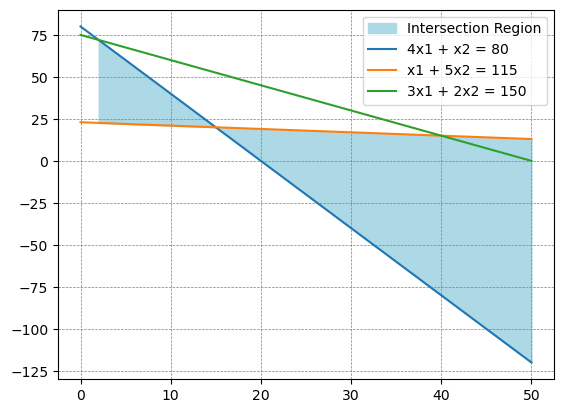

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def equation1(x):
    return 80 - 4*x
def equation2(x):
    return (115 - x) / 5
def  equation3(x):
    return (150 - 3*x) / 2

# Generate x values
x_values = np.linspace(0, 50, 100)  # You can adjust the range and number of points

y_values1 = equation1(x_values)
y_values2 = equation2(x_values)
y_values3 = equation3(x_values)

cmap = ListedColormap(['lightblue', 'lightgreen', 'lightcoral'])

# Plot the lines with the colormap fill
plt.fill_between(x_values, y_values1, y_values2, color=cmap(0), label='Intersection Region', where=np.logical_or(y_values3 >= y_values1, y_values3 <= y_values2))
#plt.fill_between(x_values, y_values2, y_values3, color=cmap(1), where=np.logical_or(y_values2 >= y_values1, y_values2 <= y_values3))
#plt.fill_between(x_values, y_values3, color=cmap(2), alpha=0.5)

plt.plot(x_values, y_values1, label='4x1 + x2 = 80')
plt.plot(x_values, y_values2, label='x1 + 5x2 = 115')
plt.plot(x_values, y_values3, label='3x1 + 2x2 = 150')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [3]:
!pip install pulp

In [4]:
from pulp import *

In [5]:
dir(pulp)

['FixedElasticSubProblem',
 'FractionElasticSubProblem',
 'Iterable',
 'LpAffineExpression',
 'LpConstraint',
 'LpConstraintVar',
 'LpElement',
 'LpFractionConstraint',
 'LpProblem',
 'LpSolverDefault',
 'LpVariable',
 'OrderedDict',
 'PULP_CBC_CMD',
 '_DICT_TYPE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clock',
 'const',
 'json',
 'log',
 'logging',
 'lpDot',
 'lpSum',
 'maketrans',
 'mpslp',
 're',
 'sys',
 'time',
 'value',
 'warnings']

# Problem

In [6]:
prob = LpProblem("Diet", LpMinimize)
prob

Diet:
MINIMIZE
None
VARIABLES

# Decision variables
The independent variables to be found to optimize the objective function are called the decision variables. In this case, x and y are the decision variables that are the unknowns of the mathematical programming model.


In [7]:
x1 = LpVariable ('x1', lowBound = 0, upBound=None, cat ='Integer', e= None)
x2 =LpVariable('x2', lowBound = 0,upBound=None, cat ='Integer',e= None)


# Objective Function :
 It is also known as the cost function or the “goal” of our optimization problem. Either we’ll maximize or minimize it based on the given problem statement. For example, it could be maximizing the profit of a company or minimizing the expenses of the company due to its regular functioning.

In [8]:
prob += 6*x1 + 3*x2
prob

Diet:
MINIMIZE
6*x1 + 3*x2 + 0
VARIABLES
0 <= x1 Integer
0 <= x2 Integer

# Constraints

- constarint on calcium : $12x_1 +3x_2 \geq 240$ , i.e., $4x_1 + x_2 \geq 80$

- constarint on iron : $4x_1 + 20x_2 \geq 460$ , i.e., $x_1 +5x_2 \geq 115$

- constarint on cholesterol : $6x_1 +4x_2 \leq 300$ , i.e., $3x_1+2x_2 \leq 150$

## Non–negativity restrictions 
The limitation on the decision variables that they will lie in the first quadrant only or their values could not be less than zero are known as the non-negative constraints. Here x, y >= 0 are the non-negative constraints
- Non negative restriction$x_1\geq 0$,$x_2\geq 0$

In [9]:
prob += 4*x1 + x2 >= 80      # calcium
prob += x1 + 5*x2 >= 115     # iron
prob += 3*x1 + 2*x2 <= 150   # cholesterol


In [10]:
prob

Diet:
MINIMIZE
6*x1 + 3*x2 + 0
SUBJECT TO
_C1: 4 x1 + x2 >= 80

_C2: x1 + 5 x2 >= 115

_C3: 3 x1 + 2 x2 <= 150

VARIABLES
0 <= x1 Integer
0 <= x2 Integer

# Solution

In [11]:
status = prob.solve()
LpStatus[status]

'Optimal'

In [13]:
x1.varValue

15.0

In [14]:
x2.varValue

20.0

In [15]:
# solution
value(x1), value(x2), value(prob.objective)

(15.0, 20.0, 150.0)

In [21]:
minimize_vitA =  6 * x1.varValue + 3 * x2.varValue
minimize_vitA

150.0

### How many packets of each food should be used to minimize the amount of vitamin  A in the diet?

For required diet, i.e to minimize the amount of vitA, 15 packets of P and 20 packets of  Q are required

## Feasible Region  – 
A feasible region or solution space is the set of all possible points of an optimization problem that satisfy the problem’s constraints. 